# Boston Housing DataSet

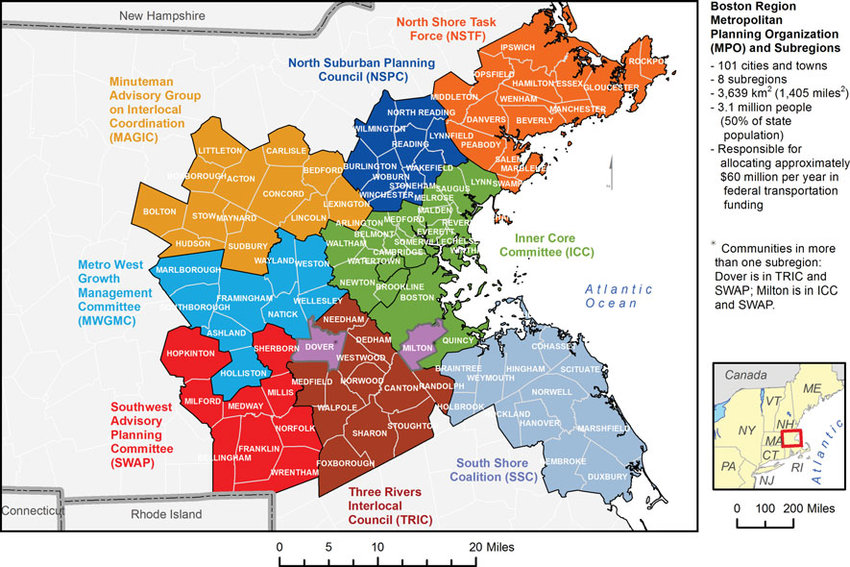

In [86]:
#importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
# For t-tests and ANOVA.
import scipy.stats as stats

In [87]:
%matplotlib inline

In [88]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [89]:
#importing the dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Describe the Dataset

In [90]:
#take a look at the datset keys
#we can see the dataset has a number of keys which correspond to the data, target, features and a description
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [91]:
#Lets take a look at each of the keys in turn starting with a description of the dataset
#We can see the various data points which are contained in the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [92]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [93]:
#view each of the keys in turn 
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [94]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [95]:
#Create a dataframe from the data set and add the feature names as column labels. 
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [96]:
#Lets take a look at the shape of the dataset
#The data set contains 506 rows and 13 columns
boston.data.shape

(506, 13)

In [97]:
#Check the data set for any null values
#We can see there are no blank fields in the dataset which may effect the statistics
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [98]:
#take a look at the first 5 rows in the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
#take a look at the last 5 rows in the dataset
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [100]:
# we can see there is no Proce column as this is contained in the target variable
#Lets add the column to the dataset
df['MEDV'] = boston.target
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [101]:
#Show the maximum price
df['MEDV'].max()

50.0

In [102]:
#show the minimum price
df['MEDV'].min()

5.0

In [103]:
#Print a description of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


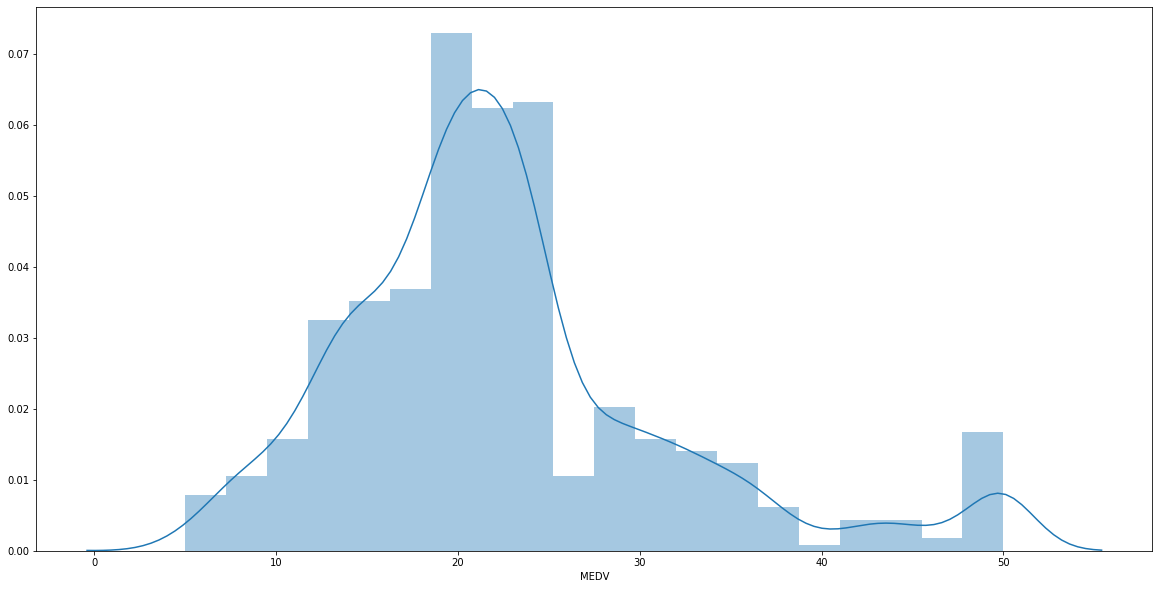

In [104]:
#Lets plot some of the statistic contained in the data set
#The median value of properties is normally distributed except for a few outliers represented by the bell shaped curve. 
sns.distplot(df['MEDV'], bins=20)
plt.show()

In [105]:
#lets create a subset of data to make plotting graphs more legible
#CRIM per capita cime rate by town
#RM average number of rooms per dwelling
#B proportion of blacks by town
#MEDV median value of owner ooccupied homes
cols = ['CRIM', 'RM', 'B', 'MEDV', 'LSTAT']

In [106]:
df[cols].head()

,CRIM,RM,B,MEDV,LSTAT
0,0.00632,6.575,396.90,24.0,4.98
1,0.02731,6.421,396.90,21.6,9.14
2,0.02729,7.185,392.83,34.7,4.03
3,0.03237,6.998,394.63,33.4,2.94
4,0.06905,7.147,396.90,36.2,5.33


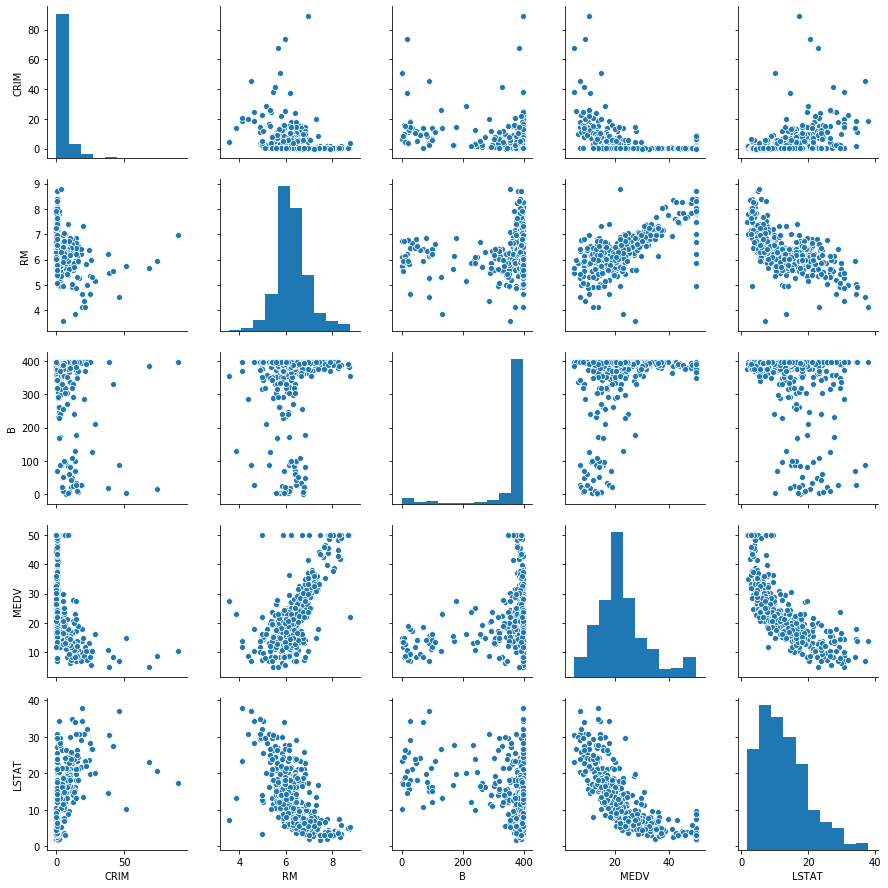

In [107]:
#plot the subset of data to identify any patterns
sns.pairplot(df[cols])

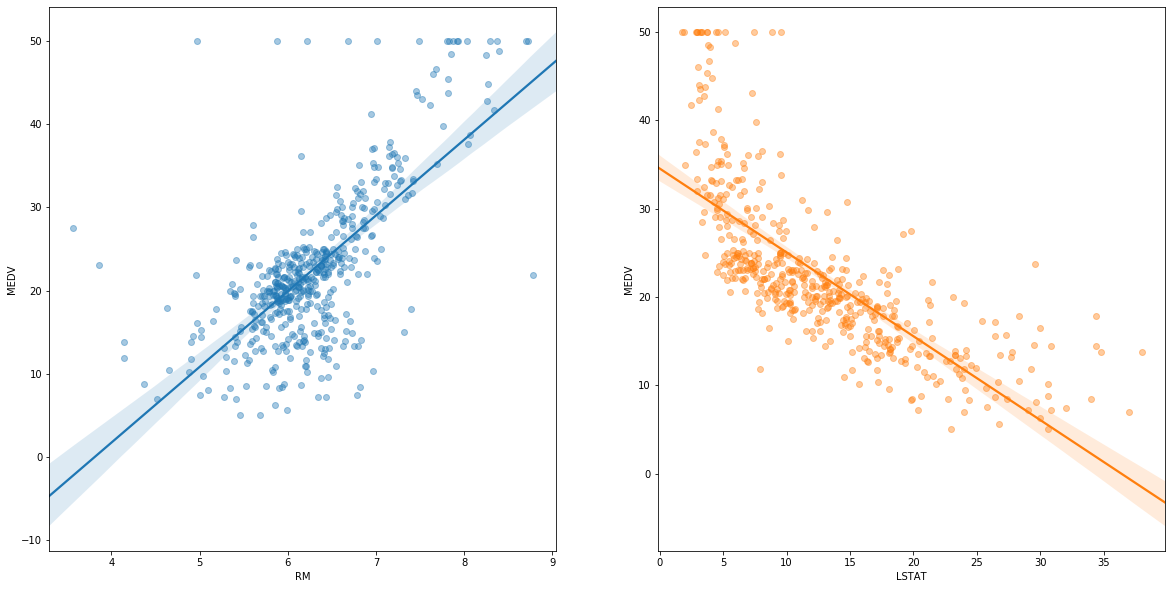

In [108]:
#Lets compare the house prices against some of the subset of features
fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'MEDV', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'MEDV', df, ax=ax[1],
scatter_kws={'alpha': 0.4}) 
 

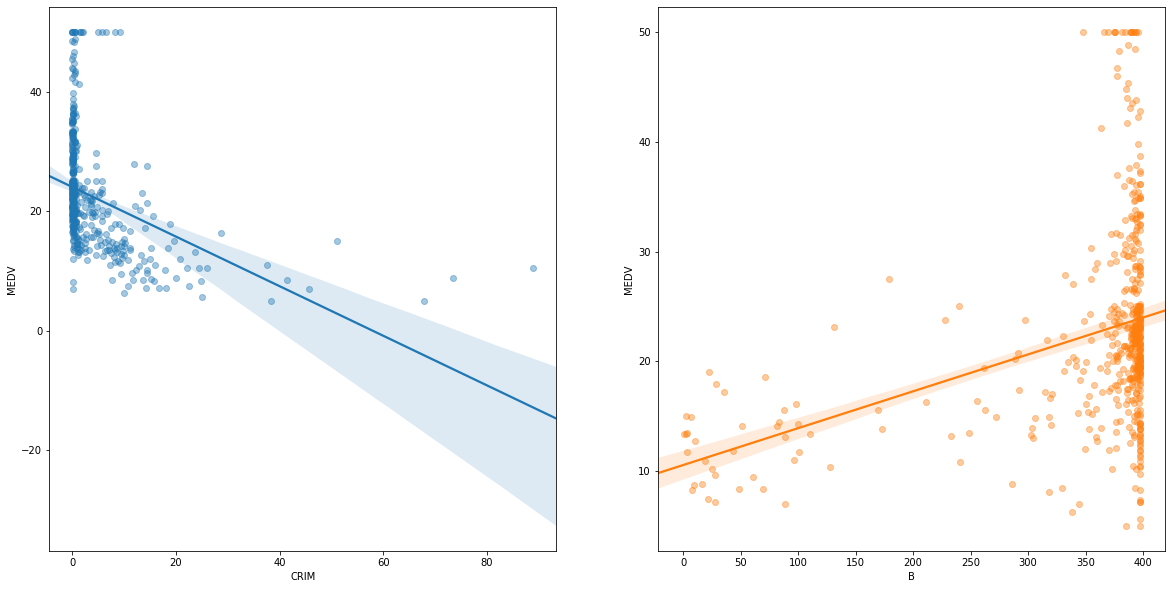

In [109]:
#Lets compare the house prices against some of the subset of features
fig, ax = plt.subplots(1, 2)
sns.regplot('CRIM', 'MEDV', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('B', 'MEDV', df, ax=ax[1],
scatter_kws={'alpha': 0.4})

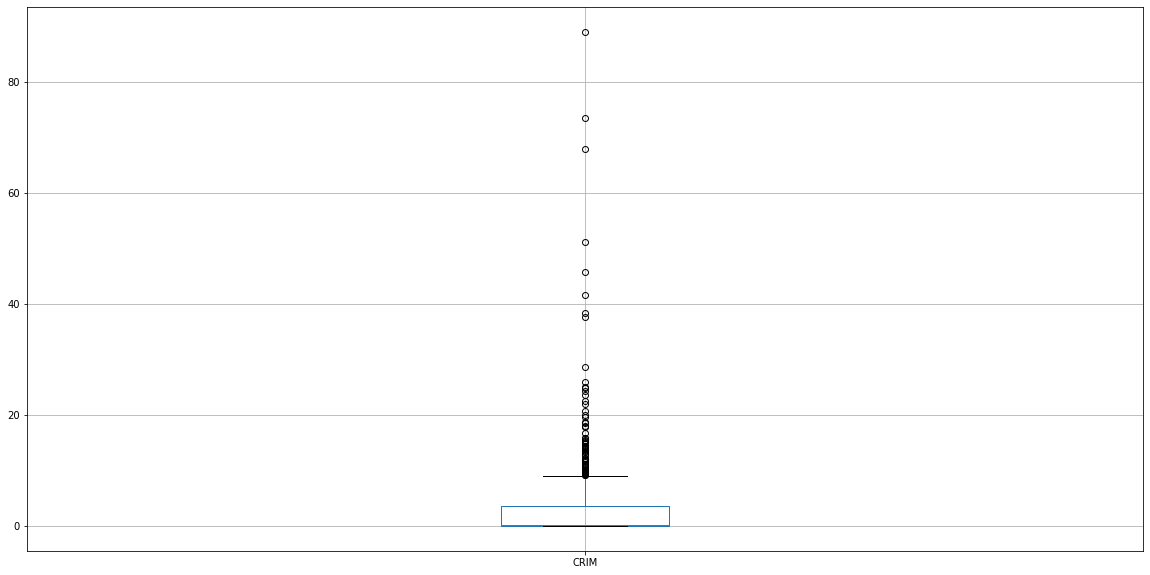

In [110]:
#Lets tak a look at a boxblot for the CRIM statistic
df.boxplot(column='CRIM', sym='o', return_type='axes')

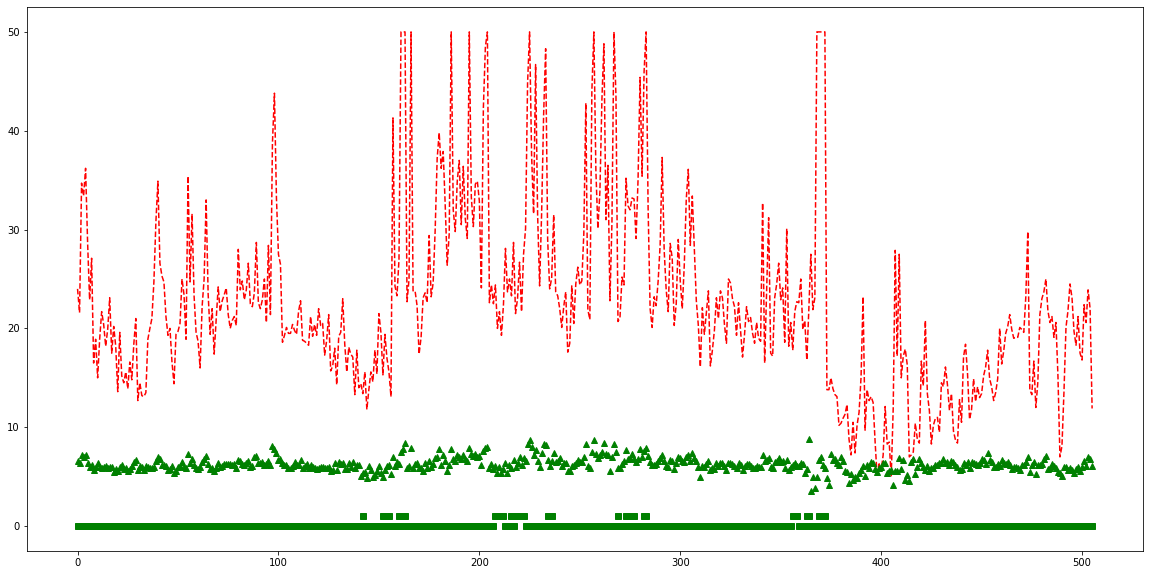

In [111]:
#Plot multiple data points  
CHAS = df.CHAS.values
MEDV = df.MEDV.values
RM = df.RM.values
plt.plot(MEDV, 'r--', CHAS, 'gs', RM, 'g^')

# INFER

Use inferential statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t.

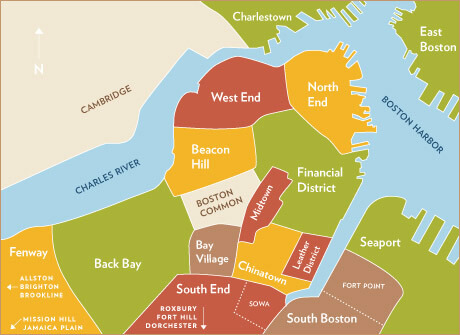

In [112]:
#Lets take a look at the correlations between various data points in the Boston Housing dataset
#we can see here that the correlation between proximity to the Charles River and the Median price is 0.175260 
#which indicates no real correlation between these data points
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


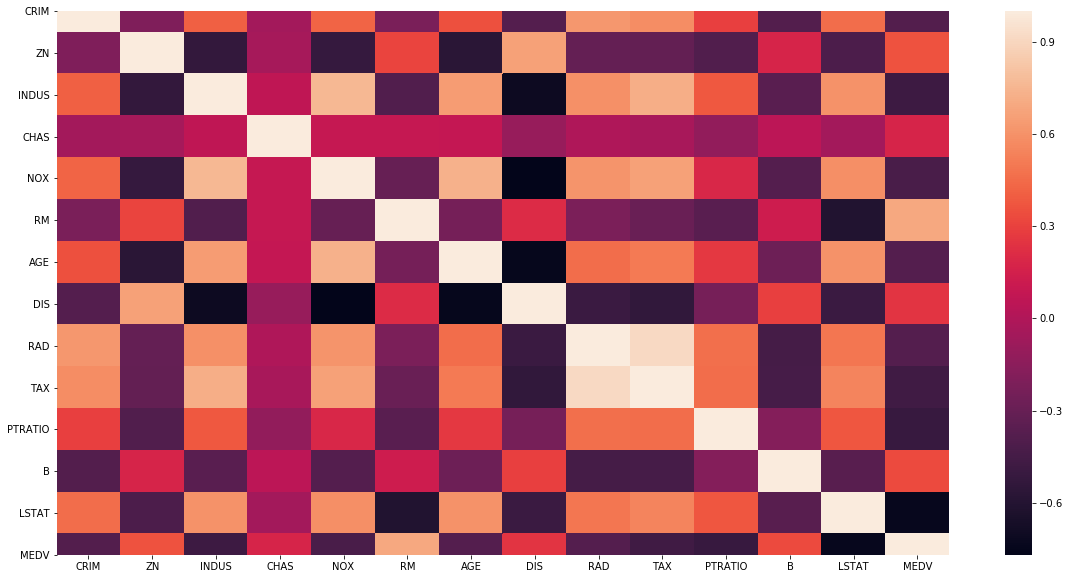

In [113]:
#We can visually display these correlations in a heatmap
#Again we can see the color code indicatinf no strong positive or negative correlation between the data points
hm = sns.heatmap(df.corr())

In [114]:
#lets take a look at he pair plots for these data points. 
cols = ['CHAS', 'MEDV']

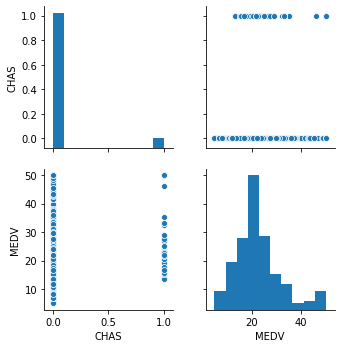

In [115]:
sns.pairplot(df[cols])

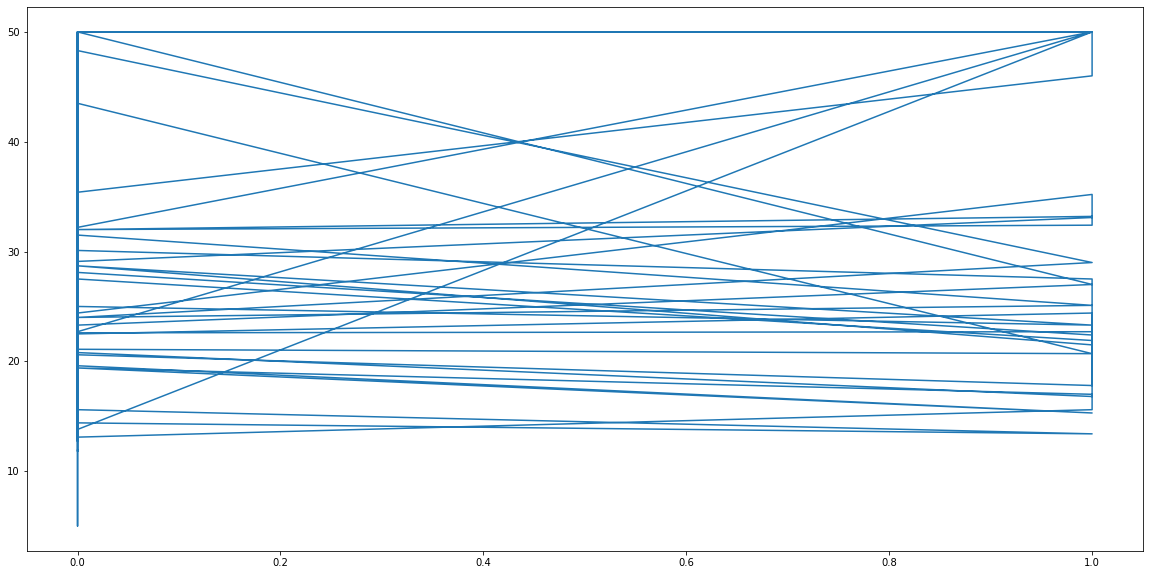

In [116]:
#plotting the values on a line graph looks a bit messy. We would expect to see a more linear output if there was a direct correlation
#Plotting house values for property which borders the Charles river and those which do not seperately might make the output clearer
#given the CHAS has a value of 0 or 1
CHAS = df.CHAS.values
MEDV = df.MEDV.values
plt.plot(CHAS, MEDV)


In [117]:
#Check if the data looks like our plot
#here we can see a majority of houses do not border the Charles Riveer ie (0) value
df.CHAS.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

In [118]:
#lets select all property which borders the river
x1 = df.loc[df['CHAS'] == 1].MEDV.values

In [119]:
#lets view all the property which does not border the Charles River 
y1 = df.loc[df['CHAS'] == 0].MEDV.values

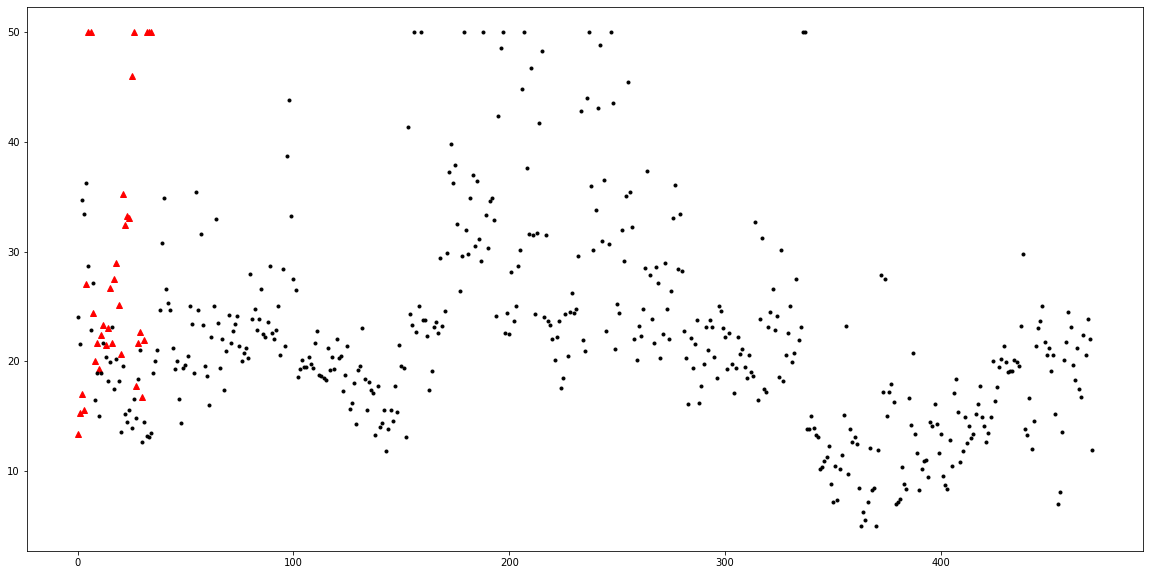

In [120]:
#Lets plot the data points on a graph
#We have a larger set of data points which do not border the Charles River indicated in black
plt.plot(x1, 'r^', y1, 'k.')


In [121]:
#print( "The max value of properties bordering the Charles river is:")
#x1.max()
#print("The min value of properties bordering the Charles River is:")
#x1.min()
print("The mean value of properties bordering the Charles River is:")
x1.mean()
#print("The standard deviation of properties bordering the Charles River is: ")
#x1.std()
#print("The variance of properties bordering the Charles River is:")
#x1.var()

The mean value of properties bordering the Charles River is:


28.439999999999998

# T-Test 

In [122]:
import scipy.stats as ss

In [123]:
#The null hypothesis states that the average value of the populations of houses which border the Charles River are equal to 
# the average values of houses which do not border the Charles River
ss.ttest_ind(x1, y1)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Given the low p value of 7.390623170519905e-05 the probability that the average value of houses which border the Charles River being equal to the average
value of houses which do not border the Charles River is extremely small. 

In [124]:
#Using the statsmodels
#We can see the results are the same as above
import statsmodels.stats.weightstats as ws
ws.ttest_ind(x1, y1)

(3.9964374660905095, 7.390623170519883e-05, 504.0)

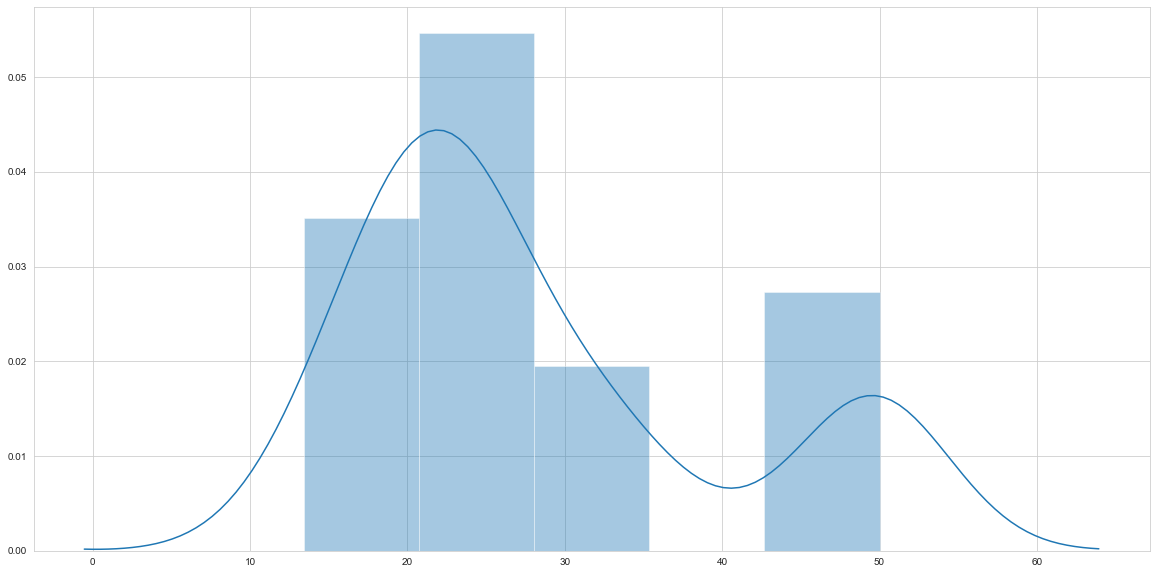

In [125]:
#Distribution plot of house values bordering the Charles River
sns.set_style("whitegrid")
sns.distplot(x1)

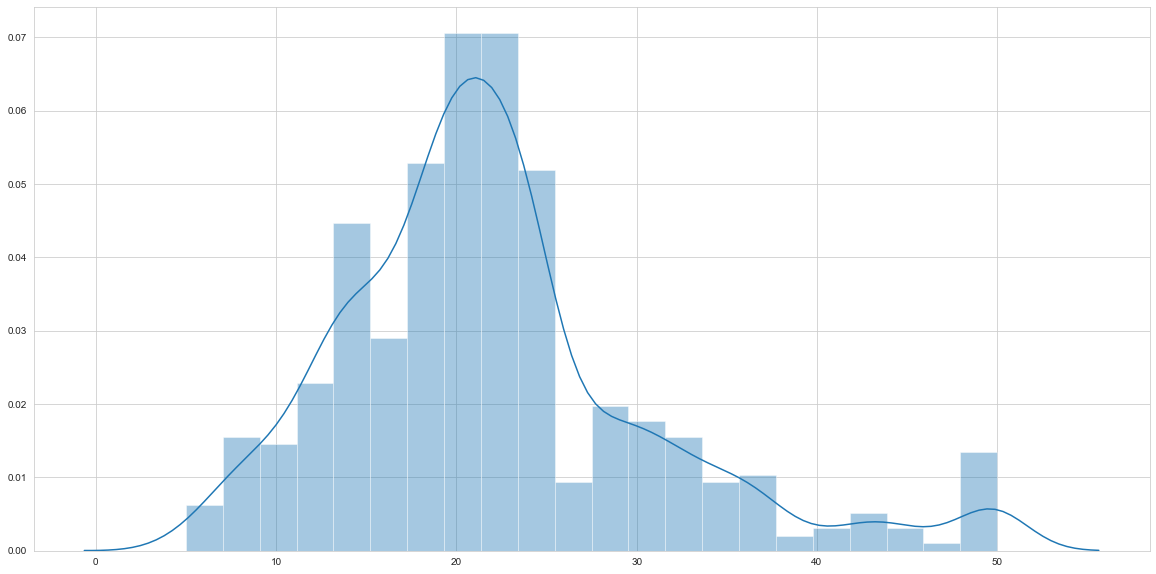

In [126]:
#Distribution plot of house values which do not border the Charles river
sns.distplot(y1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


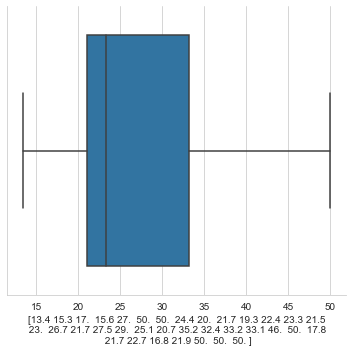

In [127]:
sns.catplot(x1, kind="box", data=df)

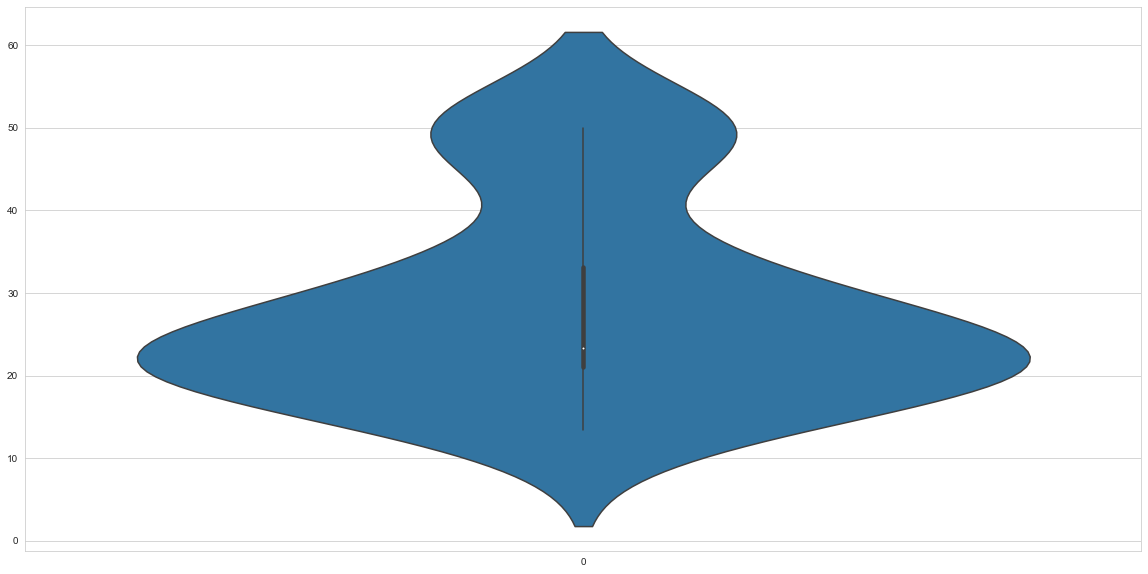

In [128]:
sns.violinplot(data=x1)

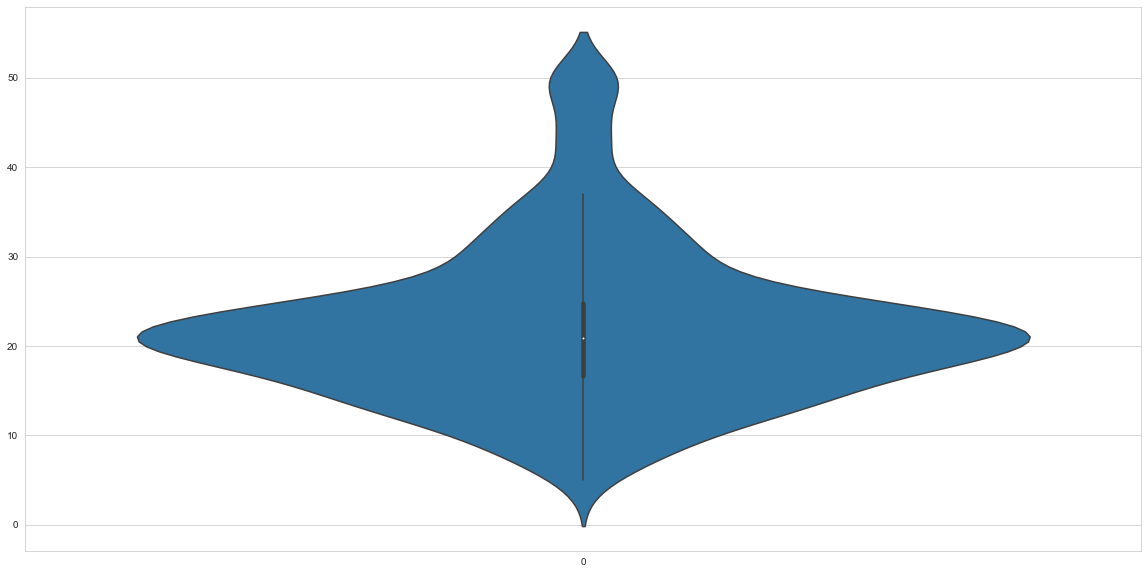

In [129]:
sns.violinplot(data=y1)

# T-Test using Anova

In [130]:
#T-Test using Anova
stats.f_oneway(x1, y1)

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

(array([0.009908  , 0.02547771, 0.03632932, 0.06794055, 0.03680113,
        0.01840057, 0.01226704, 0.00377448, 0.00471809, 0.00660533]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

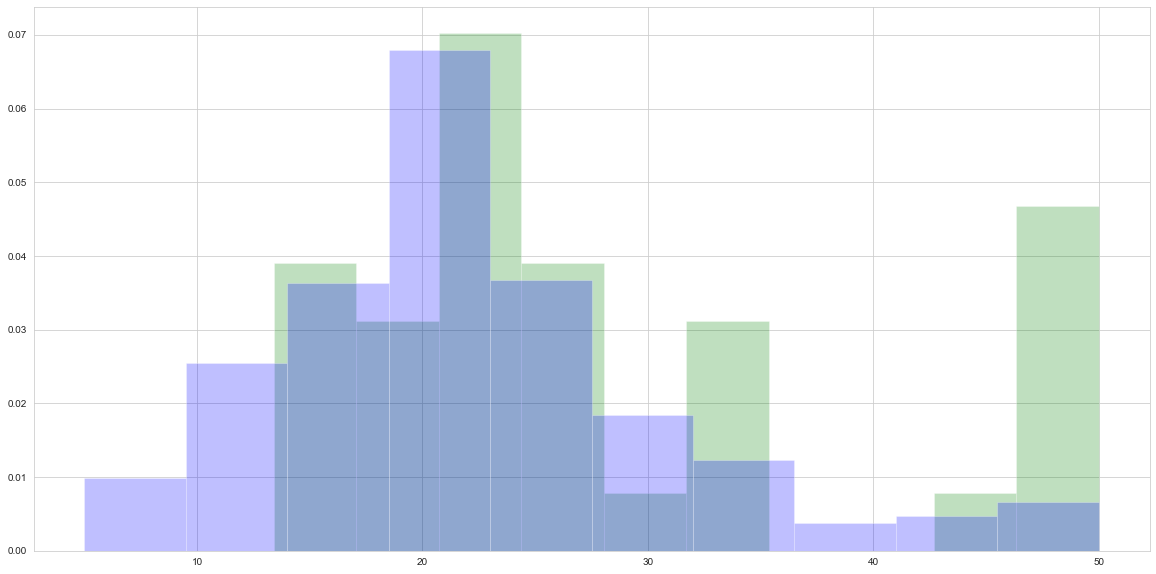

In [131]:
#Lets plot the results
x = np.linspace(1.25, 2.25, 1000)

pdfA = stats.norm.pdf(x1)
pdfB = stats.norm.pdf(y1)

#plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
#plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

plt.hist(x1, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(y1, density=True, color='b', alpha=0.25, label="Sample B")

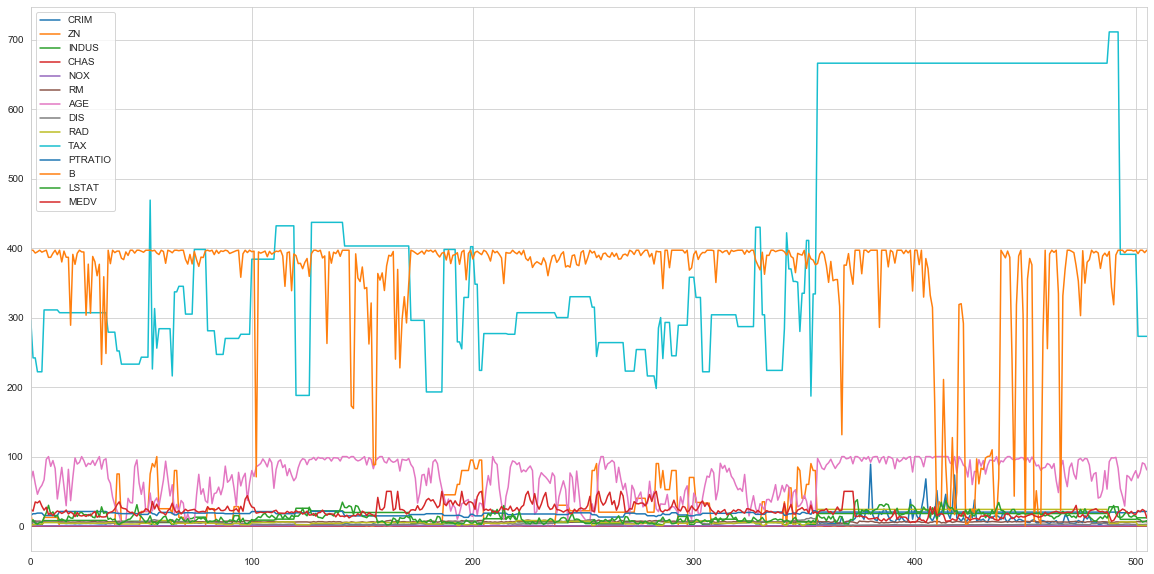

In [132]:
df.plot()

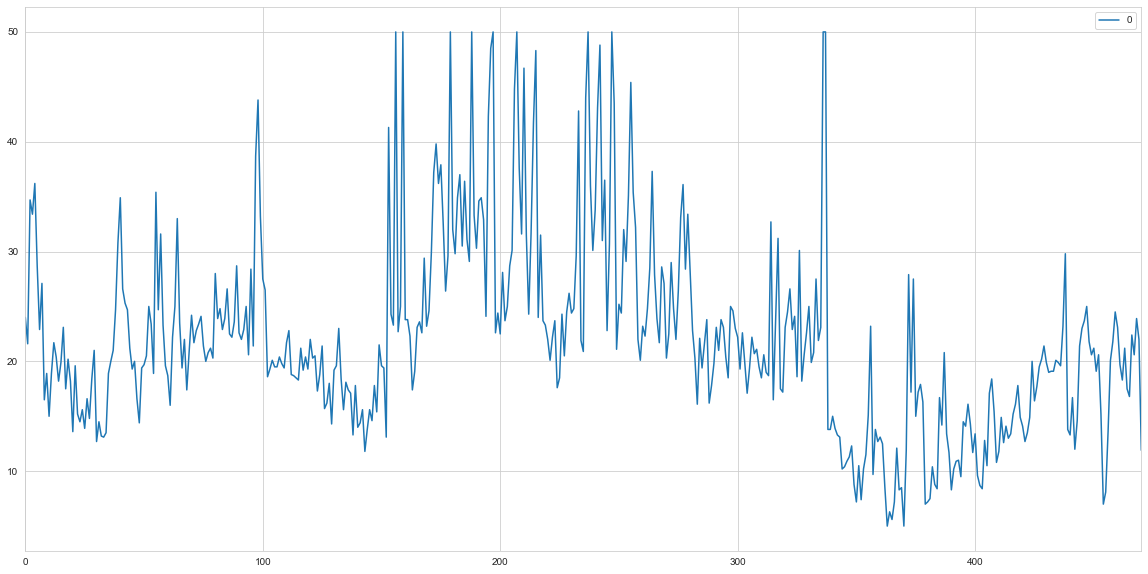

In [133]:
df = pd.DataFrame(y1)
df.plot()

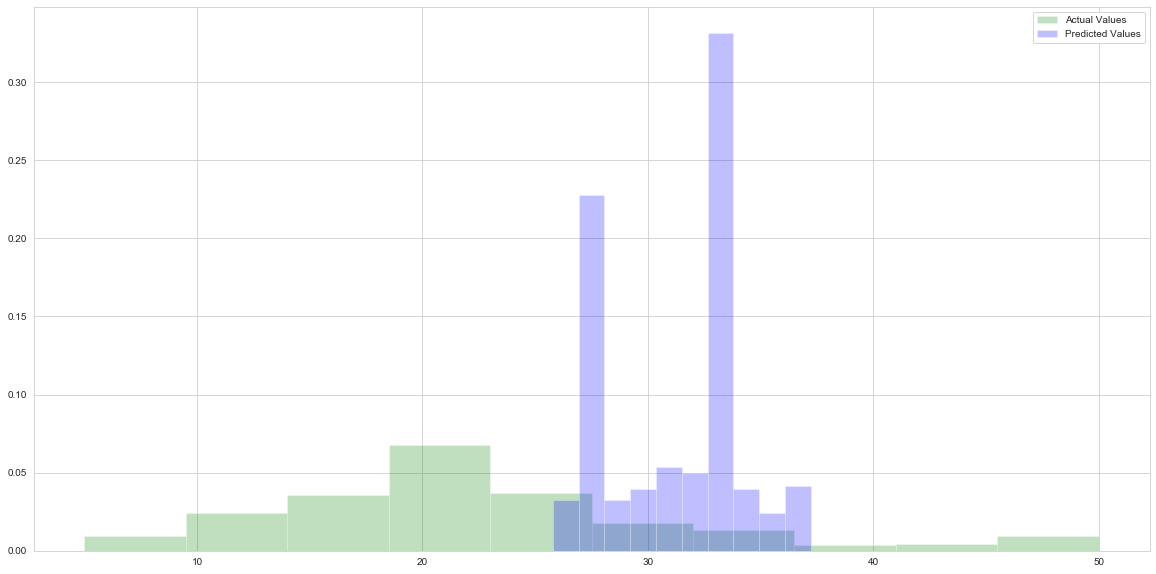

In [134]:
plt.hist(output, density=True, color='g', alpha=0.25, label="Actual Values")
plt.hist(m.predict(inputs), density=True, color='b', alpha=0.25, label="Predicted Values")

plt.legend()

# Keras

In [135]:
# import libraries
import numpy as np
import pandas as pd
import keras as kr
import sklearn.model_selection as mod
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [136]:
from sklearn.datasets import load_boston
boston = load_boston()

In [137]:
#Create a dataframe from the data set and add the feature names as column labels. 
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [138]:
df['MEDV'] = boston.target

In [139]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [140]:
#Set up our input variables. This includes all variables except the price
inputs = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [141]:
#Set up our output variable which is the median price
output = df['MEDV']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [142]:
input_train, input_test, output_train, output_test = mod.train_test_split(inputs, output, test_size=0.3)

Building and Training

In [143]:
#Create our model with 13 inputs and a single output 
m = kr.models.Sequential()
m.add(kr.layers.Dense(10, input_dim= 13, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss="mean_squared_error", optimizer="adam")

In [144]:
#Train the model
m.fit(input_train, output_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 1s 3ms/step - loss: 12819.4064
Epoch 2/100
354/354 [==============================] - 0s 124us/step - loss: 453.5549
Epoch 3/100
354/354 [==============================] - 0s 170us/step - loss: 261.8839
Epoch 4/100
354/354 [==============================] - 0s 147us/step - loss: 246.0666
Epoch 5/100
354/354 [==============================] - 0s 124us/step - loss: 231.2581
Epoch 6/100
354/354 [==============================] - 0s 102us/step - loss: 221.1034
Epoch 7/100
354/354 [==============================] - 0s 102us/step - loss: 208.8555
Epoch 8/100
354/354 [==============================] - 0s 102us/step - loss: 197.9308
Epoch 9/100
354/354 [==============================] - 0s 113us/step - loss: 185.4136
Epoch 10/100
354/354 [==============================] - 0s 102us/step - loss: 176.2187
Epoch 11/100
354/354 [==============================] - 0s 124us/step - loss: 168.1680
Epoch 12/100
354/354 [==============================

In [145]:
#Make some predictions using the test set
m.predict(input_test).round().T

array([[24., -3., 19., 21., 33., 29., 18., 17., 16.,  3., 23., 19., 21.,
        30., 29., 20., 23., 25., 19.,  9.,  7., 31., 22., 17., 20., 26.,
        20., 30., 17., 26., 10.,  7., 20., 25., 29., 22., 23., 21., 29.,
        24., 22., 23., 23., 26., 11., 27., 29., 22., 23., 18., 30., 14.,
        13., 29., 29., 29., 25., 25., 25., 15., 11., 26., 20., 24., 20.,
        20., 26., 31., 24., 23., 20.,  5., 20., 21., 23., 18., 15., 21.,
        23., 18., 25., 21.,  3., 14., 29., 25., 28., 17., 20., 21., 29.,
        13., 20., 27., 19.,  4., 25., 25., 23., 15., 21., 15., 25., 23.,
        20., 22., 14., 30., 11., 20., 21., 24., 16., 26., 30., 25., 31.,
        20., 27., 19., 23.,  7., 21., 27., 22., 13., 12., 28., 20., 28.,
        28., 16., 15., 21., 18., 24., 14., 18., 14., 22., 10.,  9., 19.,
        20., 24., 29., 19., 12., 20., 29.,  5., 19.]], dtype=float32)

In [146]:
output_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([20.3,  8.4, 18.5, 19.5, 50. , 24.8, 21.7, 17.1, 10.9,  8.8, 23.7,
       20.6, 21.2, 42.3, 21.9, 21.4, 23.7, 50. , 27.1, 14.9,  5. , 48.5,
       22.6,  7.2, 20.3, 29.9, 17.2, 37.9, 19.4, 28. , 14.1, 10.2, 18.8,
       20.4, 22.2, 17.8, 23.1, 25. , 50. , 27.5, 24.6, 20.1, 23. , 29.8,
       14.5, 43.5, 22.8, 22.6, 15.3, 20.8, 28.5, 19.1, 12.3, 27. , 26.6,
       23.9, 19.8, 31.1, 18.9, 10.2, 13.1, 30.3, 21.4, 31. , 17.4, 18.9,
       21.7, 37.6, 23.3, 20.7, 23.1,  8.4, 21.8, 26.4, 18.7, 17.4, 12.7,
       21.4, 20.1, 16.6, 20.6, 22.9,  7.5, 15.4, 50. , 23.2, 34.6, 19.4,
       29.6, 24.4, 32. , 15. , 16.2, 23. , 19.3,  8.3, 19.6, 36.1, 22. ,
       15.6, 22.8, 13.5, 22.9, 17.1, 19.8, 23.9, 10.5, 23.9, 15.6, 17.1,
       17.5, 19.9, 13.3, 30.1, 35.2, 19.2, 50. , 25.3, 31.6, 14.5, 19.6,
       13.2, 23.3, 34.9, 46.7, 13.1, 13.3, 30.1, 30.7, 31.5, 26.7, 19.3,
       21.7, 27.9, 20.5, 35.1, 11.7, 18.8, 23.1, 17. , 16.5, 14.4, 23.4,
       17.8, 18.5, 22. , 22.4, 11.9, 23.2, 48.3,  8

In [147]:
#Evaluate the model
m.evaluate(input_test, output_test)

152/152 [==============================] - 0s 2ms/step


44.07324299059416

We can see the model is performing quite poorly at the moment with a loss of approx 40. Lets alter the activation function, number of neurons, number of layers in the model to try to improve the loss

In [148]:
#rebild the neural network using various activation functions and number of neurons
m = kr.models.Sequential()
m.add(kr.layers.Dense(64, input_dim= 13, activation="tanh"))
m.add(kr.layers.Dense(64, activation="relu"))
m.add(kr.layers.Dense(64, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss="mean_squared_error", optimizer="adam")

In [149]:
#Train the model
m.fit(input_train, output_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 1s 3ms/step - loss: 319.4641
Epoch 2/100
354/354 [==============================] - 0s 124us/step - loss: 159.9581
Epoch 3/100
354/354 [==============================] - 0s 136us/step - loss: 127.6008
Epoch 4/100
354/354 [==============================] - 0s 136us/step - loss: 108.2301
Epoch 5/100
354/354 [==============================] - 0s 136us/step - loss: 96.3261
Epoch 6/100
354/354 [==============================] - 0s 102us/step - loss: 88.0768
Epoch 7/100
354/354 [==============================] - 0s 136us/step - loss: 79.6933
Epoch 8/100
354/354 [==============================] - 0s 158us/step - loss: 76.2186
Epoch 9/100
354/354 [==============================] - 0s 203us/step - loss: 71.1869
Epoch 10/100
354/354 [==============================] - 0s 215us/step - loss: 68.7772
Epoch 11/100
354/354 [==============================] - 0s 158us/step - loss: 66.7918
Epoch 12/100
354/354 [==============================] - 0s 15

Epoch 96/100
354/354 [==============================] - 0s 136us/step - loss: 30.0949
Epoch 97/100
354/354 [==============================] - 0s 124us/step - loss: 44.5899
Epoch 98/100
354/354 [==============================] - 0s 158us/step - loss: 36.8830
Epoch 99/100
354/354 [==============================] - 0s 135us/step - loss: 32.6118
Epoch 100/100
354/354 [==============================] - 0s 102us/step - loss: 34.5181


In [150]:
#Make some predictions using the test set
m.predict(input_test).round().T

array([[24., 13., 19., 21., 37., 27., 18., 14., 14., 15., 26., 21., 24.,
        27., 27., 24., 23., 27., 16., 13., 14., 36., 24., 14., 24., 26.,
        21., 37., 24., 23., 13., 13., 21., 26., 23., 14., 24., 14., 36.,
        21., 27., 23., 27., 36., 13., 35., 24., 21., 21., 15., 35., 14.,
        14., 22., 25., 27., 21., 27., 35., 14., 16., 27., 21., 27., 21.,
        20., 21., 37., 23., 24., 24., 13., 21., 26., 27., 14., 15., 21.,
        27., 24., 23., 23., 13., 14., 35., 25., 27., 14., 36., 24., 27.,
        15., 21., 24., 21., 13., 21., 31., 23., 16., 27., 14., 23., 21.,
        21., 24., 14., 24., 14., 23., 19., 26., 14., 25., 25., 21., 36.,
        25., 26., 15., 19., 14., 24., 36., 27., 14., 14., 36., 23., 34.,
        24., 17., 24., 14., 24., 36., 13., 23., 15., 14., 15., 21., 26.,
        21., 21., 24., 23., 14., 26., 33., 13., 21.]], dtype=float32)

In [151]:
output_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([20.3,  8.4, 18.5, 19.5, 50. , 24.8, 21.7, 17.1, 10.9,  8.8, 23.7,
       20.6, 21.2, 42.3, 21.9, 21.4, 23.7, 50. , 27.1, 14.9,  5. , 48.5,
       22.6,  7.2, 20.3, 29.9, 17.2, 37.9, 19.4, 28. , 14.1, 10.2, 18.8,
       20.4, 22.2, 17.8, 23.1, 25. , 50. , 27.5, 24.6, 20.1, 23. , 29.8,
       14.5, 43.5, 22.8, 22.6, 15.3, 20.8, 28.5, 19.1, 12.3, 27. , 26.6,
       23.9, 19.8, 31.1, 18.9, 10.2, 13.1, 30.3, 21.4, 31. , 17.4, 18.9,
       21.7, 37.6, 23.3, 20.7, 23.1,  8.4, 21.8, 26.4, 18.7, 17.4, 12.7,
       21.4, 20.1, 16.6, 20.6, 22.9,  7.5, 15.4, 50. , 23.2, 34.6, 19.4,
       29.6, 24.4, 32. , 15. , 16.2, 23. , 19.3,  8.3, 19.6, 36.1, 22. ,
       15.6, 22.8, 13.5, 22.9, 17.1, 19.8, 23.9, 10.5, 23.9, 15.6, 17.1,
       17.5, 19.9, 13.3, 30.1, 35.2, 19.2, 50. , 25.3, 31.6, 14.5, 19.6,
       13.2, 23.3, 34.9, 46.7, 13.1, 13.3, 30.1, 30.7, 31.5, 26.7, 19.3,
       21.7, 27.9, 20.5, 35.1, 11.7, 18.8, 23.1, 17. , 16.5, 14.4, 23.4,
       17.8, 18.5, 22. , 22.4, 11.9, 23.2, 48.3,  8

In [152]:
#Evaluate the model
m.evaluate(input_test, output_test)

152/152 [==============================] - 0s 2ms/step


33.53747247394762

We can see by altering the number of nuerons, activation functions and layers in the neural network, we can reduce the loss to approx 20. Lets try to improve the scores of our model using Scalers and Whitening 

# Scaling

In [153]:
scaler = pre.StandardScaler()
scaler.fit(input_train)
input_train_scaled = scaler.transform(input_train)

In [154]:
#Build our model
m = kr.models.Sequential()
m.add(kr.layers.Dense(64, input_dim= 13, activation="tanh"))
m.add(kr.layers.Dense(64, activation="relu"))
m.add(kr.layers.Dense(64, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss="mean_squared_error", optimizer="adam")

In [155]:
#train the model with our scaled data
m.fit(input_train_scaled, output_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 1s 3ms/step - loss: 465.8791
Epoch 2/100
354/354 [==============================] - 0s 215us/step - loss: 245.8708
Epoch 3/100
354/354 [==============================] - 0s 282us/step - loss: 156.8177
Epoch 4/100
354/354 [==============================] - 0s 192us/step - loss: 121.1750
Epoch 5/100
354/354 [==============================] - 0s 135us/step - loss: 102.5219
Epoch 6/100
354/354 [==============================] - 0s 192us/step - loss: 89.3985
Epoch 7/100
354/354 [==============================] - 0s 147us/step - loss: 75.8448
Epoch 8/100
354/354 [==============================] - 0s 124us/step - loss: 65.6538
Epoch 9/100
354/354 [==============================] - 0s 181us/step - loss: 58.8512
Epoch 10/100
354/354 [==============================] - 0s 249us/step - loss: 54.1625
Epoch 11/100
354/354 [==============================] - 0s 124us/step - loss: 50.4052
Epoch 12/100
354/354 [==============================] - 0s 1

Epoch 97/100
354/354 [==============================] - 0s 192us/step - loss: 1.8873
Epoch 98/100
354/354 [==============================] - 0s 124us/step - loss: 1.8648
Epoch 99/100
354/354 [==============================] - 0s 102us/step - loss: 1.6959
Epoch 100/100
354/354 [==============================] - 0s 124us/step - loss: 1.6609


In [156]:
input_test_scaled = scaler.transform(input_test)
m.predict(input_test_scaled).round().T

array([[19.,  8., 17., 20., 49., 27., 25., 14., 12., 12., 24., 23., 21.,
        43., 21., 21., 24., 49., 16., 12.,  7., 48., 24., 11., 22., 28.,
        18., 31., 20., 28., 21., 11., 20., 18., 24., 11., 22., 27., 49.,
        27., 25., 18., 23., 29., 17., 48., 25., 21., 20., 28., 31., 17.,
        11., 37., 27., 23., 23., 30., 17.,  9., 15., 30., 21., 33., 17.,
        18., 17., 40., 23., 22., 24., 12., 20., 24., 19., 19., 14., 35.,
        22., 21., 19., 19., 12., 19., 33., 22., 33., 19., 30., 23., 31.,
        31., 16., 28., 18.,  9., 21., 38., 26., 15., 23., 18., 21., 20.,
        19., 24.,  8., 29., 17., 17., 18., 18., 15., 26., 40., 22., 49.,
        24., 31., 14., 18., 19., 25., 35., 46.,  9., 18., 31., 29., 34.,
        28., 21., 19., 36., 19., 35., 13., 19., 29., 19., 16., 20., 24.,
        17., 20., 26., 24., 14., 24., 46.,  9., 19.]], dtype=float32)

In [157]:
output_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([20.3,  8.4, 18.5, 19.5, 50. , 24.8, 21.7, 17.1, 10.9,  8.8, 23.7,
       20.6, 21.2, 42.3, 21.9, 21.4, 23.7, 50. , 27.1, 14.9,  5. , 48.5,
       22.6,  7.2, 20.3, 29.9, 17.2, 37.9, 19.4, 28. , 14.1, 10.2, 18.8,
       20.4, 22.2, 17.8, 23.1, 25. , 50. , 27.5, 24.6, 20.1, 23. , 29.8,
       14.5, 43.5, 22.8, 22.6, 15.3, 20.8, 28.5, 19.1, 12.3, 27. , 26.6,
       23.9, 19.8, 31.1, 18.9, 10.2, 13.1, 30.3, 21.4, 31. , 17.4, 18.9,
       21.7, 37.6, 23.3, 20.7, 23.1,  8.4, 21.8, 26.4, 18.7, 17.4, 12.7,
       21.4, 20.1, 16.6, 20.6, 22.9,  7.5, 15.4, 50. , 23.2, 34.6, 19.4,
       29.6, 24.4, 32. , 15. , 16.2, 23. , 19.3,  8.3, 19.6, 36.1, 22. ,
       15.6, 22.8, 13.5, 22.9, 17.1, 19.8, 23.9, 10.5, 23.9, 15.6, 17.1,
       17.5, 19.9, 13.3, 30.1, 35.2, 19.2, 50. , 25.3, 31.6, 14.5, 19.6,
       13.2, 23.3, 34.9, 46.7, 13.1, 13.3, 30.1, 30.7, 31.5, 26.7, 19.3,
       21.7, 27.9, 20.5, 35.1, 11.7, 18.8, 23.1, 17. , 16.5, 14.4, 23.4,
       17.8, 18.5, 22. , 22.4, 11.9, 23.2, 48.3,  8

In [158]:
m.evaluate(input_test_scaled, output_test)

152/152 [==============================] - 0s 2ms/step


12.8469540947362

We can see that Scaling our dataset has drastically improved our model with loss reduced to approx 1 and our evaluation score also reduced

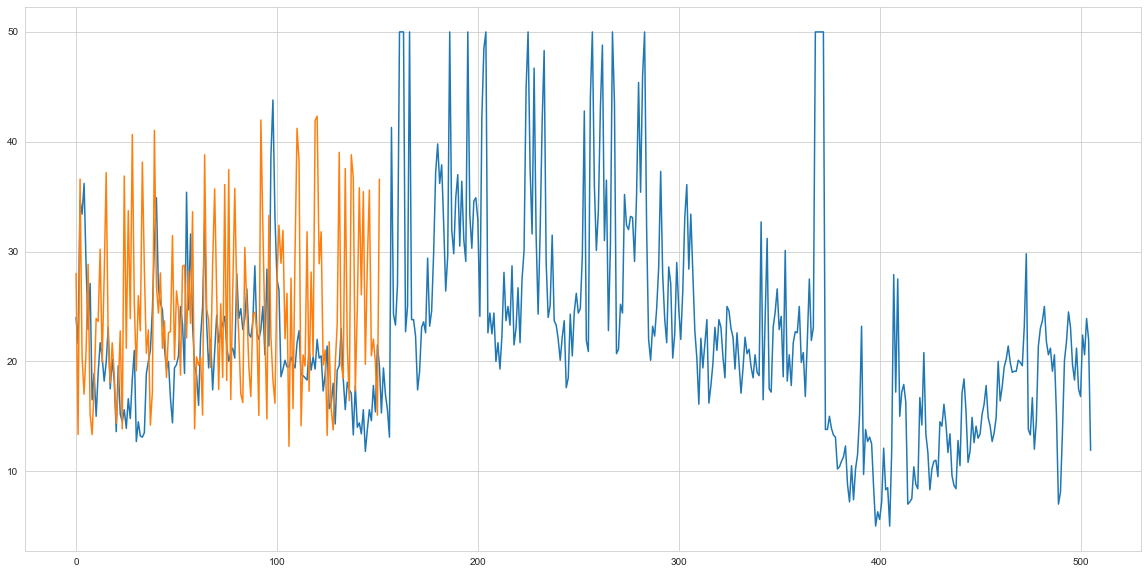

In [170]:
plt.plot(output)
plt.plot(m.predict(input_test_scaled))

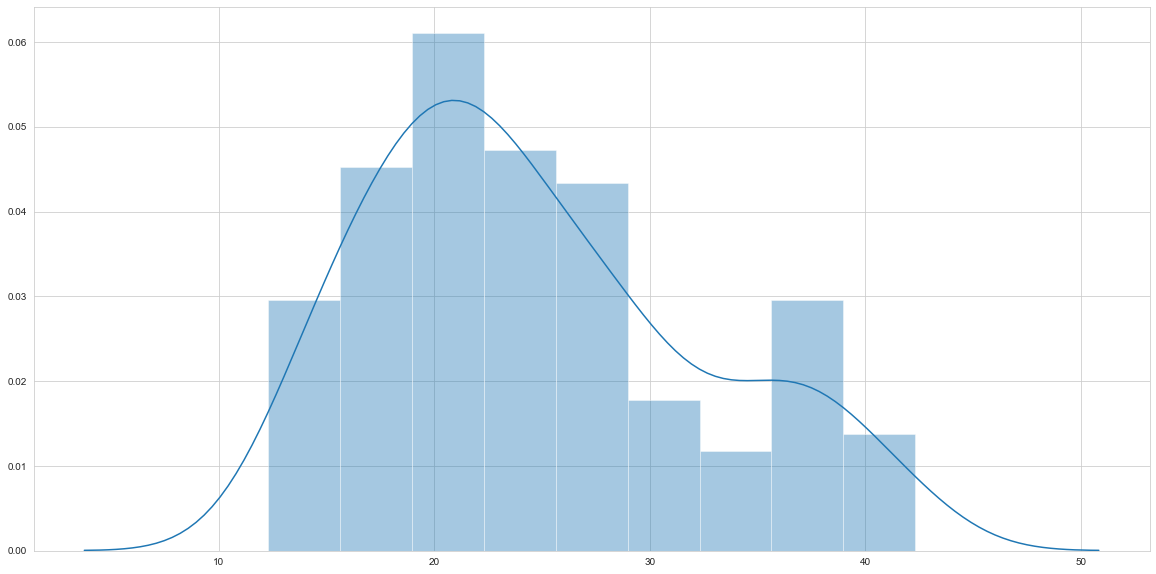

In [171]:
sns.distplot(m.predict(input_test_scaled))

# Whitening

In [159]:
#view correlations between the various variables
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


We will use whitening to remove the correlations between the variables

In [160]:
import sklearn.decomposition as dec
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(input_train)
input_train_white = pd.DataFrame(pca.transform(input_train), columns=inputs.columns)
input_train_white

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.311936,-1.334168,0.840467,-1.325691,0.641892,-0.177460,0.029318,0.739467,-0.171352,-0.140762,-0.770885,-0.252482,-0.836209
1,1.353410,-1.134971,-0.176705,0.223923,-1.059550,-1.318740,-0.246893,0.878940,0.362967,-0.002093,-3.007935,-0.533494,1.668059
2,-0.620891,-0.022423,-0.886022,0.055186,-0.013751,-0.806325,-0.869006,0.033867,-0.702681,-0.135425,0.624722,3.983337,-0.648202
3,1.322221,-1.316001,0.332206,-0.543153,-0.767892,-1.559669,0.266581,1.022214,0.435007,0.679514,0.609841,-0.716391,-1.627228
4,-0.606566,0.082137,-1.003796,0.252857,-0.287967,-1.787106,-0.299030,0.158227,-0.452872,-0.406670,3.568273,-0.916750,-0.539985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1.332103,-1.334497,-0.088814,0.040171,2.348038,1.660008,-1.220498,-0.176235,-0.677582,-0.330919,0.117709,0.077043,0.042027
350,-0.508522,-0.196975,1.031115,0.564862,-0.282510,-0.403197,-0.007782,-2.217582,1.611614,1.630848,0.142171,0.262350,1.096262
351,-0.831897,0.083155,-0.696317,-0.347073,-0.011835,-0.606421,-0.408231,-1.346190,-0.433109,-1.001916,-0.294153,-0.177127,-0.289192
352,-0.948965,0.124101,1.187161,0.001984,0.164814,-0.150614,0.498311,1.119888,0.054693,-1.284525,0.175085,4.101708,0.014772


In [161]:
#take a look at the correlations of the whitened data. We can see the correlations have been removed
input_train_white.corr().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
ZN,-0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
INDUS,-0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
CHAS,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
NOX,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
RM,-0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
AGE,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
DIS,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0
RAD,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0
TAX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,-0.0


In [162]:
#take a look at the mean values
#0 values as expected
input_train_white.mean().round()

CRIM      -0.0
ZN         0.0
INDUS      0.0
CHAS      -0.0
NOX        0.0
RM        -0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX       -0.0
PTRATIO   -0.0
B          0.0
LSTAT     -0.0
dtype: float64

In [163]:
#take a look at the standard deviation values
#1 values as expected
input_train_white.std().round()

CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
dtype: float64

In [164]:
#Build our model
m = kr.models.Sequential()
m.add(kr.layers.Dense(64, input_dim= 13, activation="tanh"))
m.add(kr.layers.Dense(64, activation="relu"))
m.add(kr.layers.Dense(64, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss="mean_squared_error", optimizer="adam")

In [165]:
#train out model
m.fit(input_train_white, output_train, epochs=100, batch_size=10)

Epoch 1/100
354/354 [==============================] - 1s 4ms/step - loss: 484.2757
Epoch 2/100
354/354 [==============================] - 0s 359us/step - loss: 260.9512
Epoch 3/100
354/354 [==============================] - 0s 501us/step - loss: 144.3695
Epoch 4/100
354/354 [==============================] - 0s 233us/step - loss: 103.3630
Epoch 5/100
354/354 [==============================] - 0s 184us/step - loss: 83.3901
Epoch 6/100
354/354 [==============================] - 0s 158us/step - loss: 71.2070
Epoch 7/100
354/354 [==============================] - 0s 226us/step - loss: 62.6467
Epoch 8/100
354/354 [==============================] - 0s 124us/step - loss: 56.1080
Epoch 9/100
354/354 [==============================] - 0s 147us/step - loss: 51.1491
Epoch 10/100
354/354 [==============================] - 0s 169us/step - loss: 47.2396
Epoch 11/100
354/354 [==============================] - 0s 147us/step - loss: 44.2048
Epoch 12/100
354/354 [==============================] - 0s 22

354/354 [==============================] - 0s 282us/step - loss: 0.8224
Epoch 98/100
354/354 [==============================] - 0s 203us/step - loss: 0.7387
Epoch 99/100
354/354 [==============================] - 0s 215us/step - loss: 0.5812
Epoch 100/100
354/354 [==============================] - 0s 136us/step - loss: 0.6139


We can see that whitening also helps to reduce the loss of our model

In [166]:
input_test_white = scaler.transform(input_test)
m.predict(input_test_white).round().T

array([[28., 13., 37., 20., 17., 21., 29., 15., 13., 18., 24., 24., 30.,
        20., 28., 37., 22., 18., 22., 19., 14., 17., 23., 14., 37., 21.,
        34., 24., 41., 25., 19., 26., 23., 38., 28., 21., 23., 14., 17.,
        41., 27., 24., 28., 21., 24., 19., 23., 23., 31., 20., 26., 25.,
        19., 29., 29., 22., 28., 23., 34., 14., 20., 20., 20., 15., 39.,
        25., 24., 19., 29., 36., 26., 17., 25., 19., 36., 18., 37., 17.,
        26., 36., 26., 22., 17., 16., 30., 25., 20., 17., 24., 24., 23.,
        15., 42., 32., 23., 15., 33., 22., 18., 16., 27., 32., 29., 32.,
        22., 26., 12., 28., 16., 30., 41., 38., 14., 21., 20., 32., 17.,
        28., 20., 42., 42., 29., 32., 20., 21., 13., 22., 16., 14., 20.,
        23., 39., 20., 18., 38., 21., 16., 39., 37., 17., 25., 36., 26.,
        35., 20., 29., 36., 21., 22., 20., 15., 37.]], dtype=float32)

In [167]:
output_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([20.3,  8.4, 18.5, 19.5, 50. , 24.8, 21.7, 17.1, 10.9,  8.8, 23.7,
       20.6, 21.2, 42.3, 21.9, 21.4, 23.7, 50. , 27.1, 14.9,  5. , 48.5,
       22.6,  7.2, 20.3, 29.9, 17.2, 37.9, 19.4, 28. , 14.1, 10.2, 18.8,
       20.4, 22.2, 17.8, 23.1, 25. , 50. , 27.5, 24.6, 20.1, 23. , 29.8,
       14.5, 43.5, 22.8, 22.6, 15.3, 20.8, 28.5, 19.1, 12.3, 27. , 26.6,
       23.9, 19.8, 31.1, 18.9, 10.2, 13.1, 30.3, 21.4, 31. , 17.4, 18.9,
       21.7, 37.6, 23.3, 20.7, 23.1,  8.4, 21.8, 26.4, 18.7, 17.4, 12.7,
       21.4, 20.1, 16.6, 20.6, 22.9,  7.5, 15.4, 50. , 23.2, 34.6, 19.4,
       29.6, 24.4, 32. , 15. , 16.2, 23. , 19.3,  8.3, 19.6, 36.1, 22. ,
       15.6, 22.8, 13.5, 22.9, 17.1, 19.8, 23.9, 10.5, 23.9, 15.6, 17.1,
       17.5, 19.9, 13.3, 30.1, 35.2, 19.2, 50. , 25.3, 31.6, 14.5, 19.6,
       13.2, 23.3, 34.9, 46.7, 13.1, 13.3, 30.1, 30.7, 31.5, 26.7, 19.3,
       21.7, 27.9, 20.5, 35.1, 11.7, 18.8, 23.1, 17. , 16.5, 14.4, 23.4,
       17.8, 18.5, 22. , 22.4, 11.9, 23.2, 48.3,  8

In [168]:
m.evaluate(input_test_white, output_test)

152/152 [==============================] - 0s 2ms/step


164.99363226639596

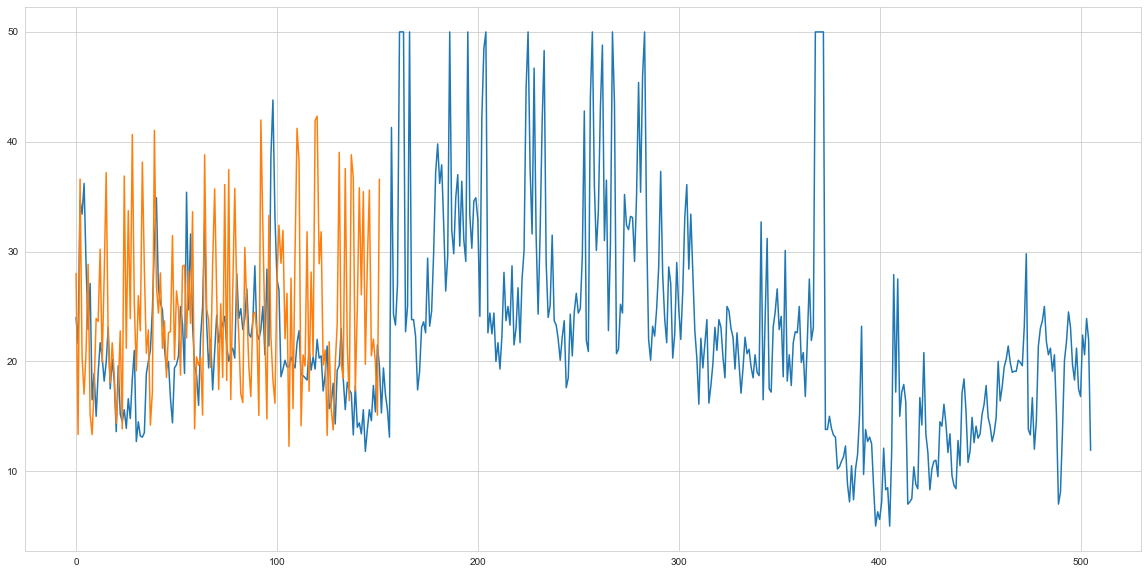

In [169]:
plt.plot(output)
plt.plot(m.predict(input_test_white))

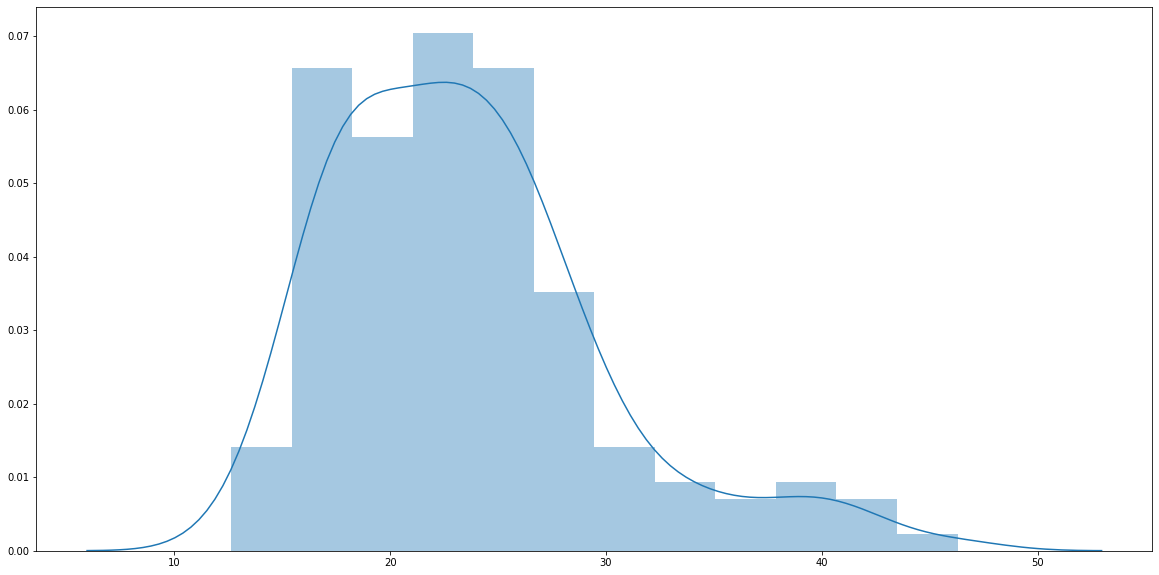

In [85]:
sns.distplot(m.predict(input_test_white))

# END